# TFM. Modelo
## MVP

## Importacion de librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

## Modelo

In [2]:
df_data = pd.read_pickle('./data/df_data')

In [3]:
df_data.head()

,index,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce,E-commerce canje,Ecobox 25,Económico,Express documentos,Express paquetes,Marítimo baleares,Mascotas,Mrw economy (ecopaq),OperativaServicioEnumECOBA,Plan ayuda,Retorno albarán,Retorno burofax,Retorno canje,Urgente 10,Urgente 10 expedición,Urgente 12,Urgente 12 expedición,Urgente 14,Urgente 14 expedición,Urgente 19,Urgente 19 expedición,Urgente 8:30,Urgente 8:30 expedición,Urgente funchal,Urgente hoy,Friday,Monday,Thursday,Tuesday,Wednesday,dateCreacion
1,2020-01-02,6.556778,0.0,0.0,0.000000,0.0,0.0,0.0,4.521789,0.0,0.0,3.465736,0.0,0.0,5.023881,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.098612,0.000000,1.791759,0.000000,0.000000,0.0,6.033086,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,262.0
2,2020-01-03,5.262690,0.0,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,5.225747,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.693147,0.000000,0.693147,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,351.0
6,2020-01-07,8.087640,0.0,0.0,2.079442,0.0,0.0,0.0,6.661855,0.0,0.0,5.897154,0.0,0.0,7.345365,2.639057,0.0,0.0,0.0,1.386294,0.0,0.0,4.859812,1.791759,5.170484,2.639057,0.000000,0.0,4.969813,4.094345,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,239.0
7,2020-01-08,5.501258,0.0,0.0,0.000000,0.0,0.0,0.0,4.369448,0.0,0.0,0.000000,0.0,0.0,5.093750,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,203.0
8,2020-01-09,7.692113,0.0,0.0,1.386294,0.0,0.0,0.0,6.393591,0.0,0.0,5.710427,0.0,0.0,6.639876,2.890372,0.0,0.0,0.0,0.000000,0.0,0.0,4.691348,0.000000,5.332719,3.295837,1.386294,0.0,4.770685,3.526361,0.693147,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,232.0


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [5]:
reg = LinearRegression()

In [6]:
#X = df_explore.loc[:,['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]
X = df_data.iloc[:,1:-1]
y = df_data['dateCreacion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
X.columns

Index(['total', 'Bag 14', 'Bag 19', 'Burofax', 'Devolución burofax',
       'Documentos 14', 'E-Commerce', 'E-commerce', 'E-commerce canje',
       'Ecobox 25', 'Económico', 'Express documentos', 'Express paquetes',
       'Marítimo baleares', 'Mascotas', 'Mrw economy (ecopaq)',
       'OperativaServicioEnumECOBA', 'Plan ayuda', 'Retorno albarán',
       'Retorno burofax', 'Retorno canje', 'Urgente 10',
       'Urgente 10 expedición', 'Urgente 12', 'Urgente 12 expedición',
       'Urgente 14', 'Urgente 14 expedición', 'Urgente 19',
       'Urgente 19 expedición', 'Urgente 8:30', 'Urgente 8:30 expedición',
       'Urgente funchal', 'Urgente hoy', 'Friday', 'Monday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [8]:
reg.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = reg.predict(X_test)

In [10]:
mean_absolute_error(y_test, y_pred)

73.77140885611318

In [11]:
analisisX = df_data.iloc[:,-1].reset_index()
analisisX = analisisX['dateCreacion']

analisisPre = reg.predict(X)
analisisPre = pd.DataFrame(analisisPre)
#analisisX, analisisPre

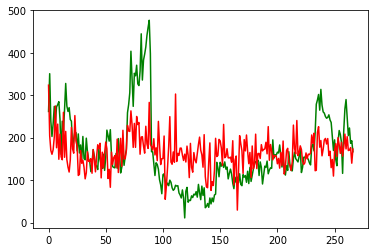

In [12]:
plt.plot(analisisX, c='green')
plt.plot(analisisPre, c='red')

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [14]:
reg_gs = GridSearchCV(KNeighborsRegressor(),
                        param_grid={"n_neighbors":np.arange(3,50)})

In [15]:
reg_gs.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [16]:
reg_gs.best_params_, reg_gs.best_score_

({'n_neighbors': 49}, -2.7354657324839233)

In [17]:
regk = KNeighborsRegressor(n_neighbors=3)

In [18]:
regk.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [19]:
y_predk = regk.predict(X_test)

In [20]:
#MAE
mean_absolute_error(y_test, y_predk)

74.3395061728395

In [21]:
cross_val_score(regk,X,y,scoring='neg_mean_absolute_error').mean()

-85.59671558350804

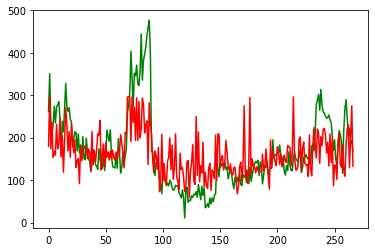

In [22]:
analisisPre = regk.predict(X)
analisisPre = pd.DataFrame(analisisPre)
analisisPre

plt.plot(analisisX, c='green')
plt.plot(analisisPre, c='red')